Just a small notebook to experiment with the BalancedDataPipe class

In [1]:
from balanced_data_pipe import BalancedDataPipe
import tensorflow as tf
from math import ceil, floor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pooling = 'avg'
batch_size = 64
seed = 42

In [3]:
data_pipe =  BalancedDataPipe(
    data_directory="../res/images/",
    rng_seed=seed,
    val_split=0.2,
    batch_size=batch_size
)

Found 3542 files belonging to 8 classes.
Using 2834 files for training.
Found 3542 files belonging to 8 classes.
Using 708 files for validation.


In [4]:
def plot_batches(d, k=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    if k is None:
        ds = d
    else:
        ds = d.take(k)
        
    class_counts = np.zeros((1, 8))

    for nmb, (features, labels) in enumerate(ds):
        un = np.unique(labels.numpy(), return_counts=True)
        class_counts[nmb, un[0]] = un[1]
        class_counts = np.vstack((class_counts, np.zeros((1, 8))))

    class_counts = class_counts[:-1,:]

    bottom = np.zeros(class_counts.shape[0])
    for label in range(8):
            ax.bar(range(class_counts.shape[0]), class_counts[:,label], label=str(label + 1), bottom = bottom, width=1)
            bottom += class_counts[:,label]

    sums = np.sum(class_counts, axis=0)

    if ax is None:
        fig.show()

    return sums

In [5]:
original_dataset = data_pipe.train_ds.batch(batch_size)

oversampled_infinite_ds = data_pipe.get_infinite_over_sampled_dataset()
subsampled_fixed_ds = data_pipe.get_fixed_sub_sampled_dataset()
oversampled_fixed_ds = data_pipe.get_fixed_over_sampled_dataset()

In [6]:
original_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

C:\Users\Achille\AppData\Local\Temp\ipykernel_17624\80430003.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


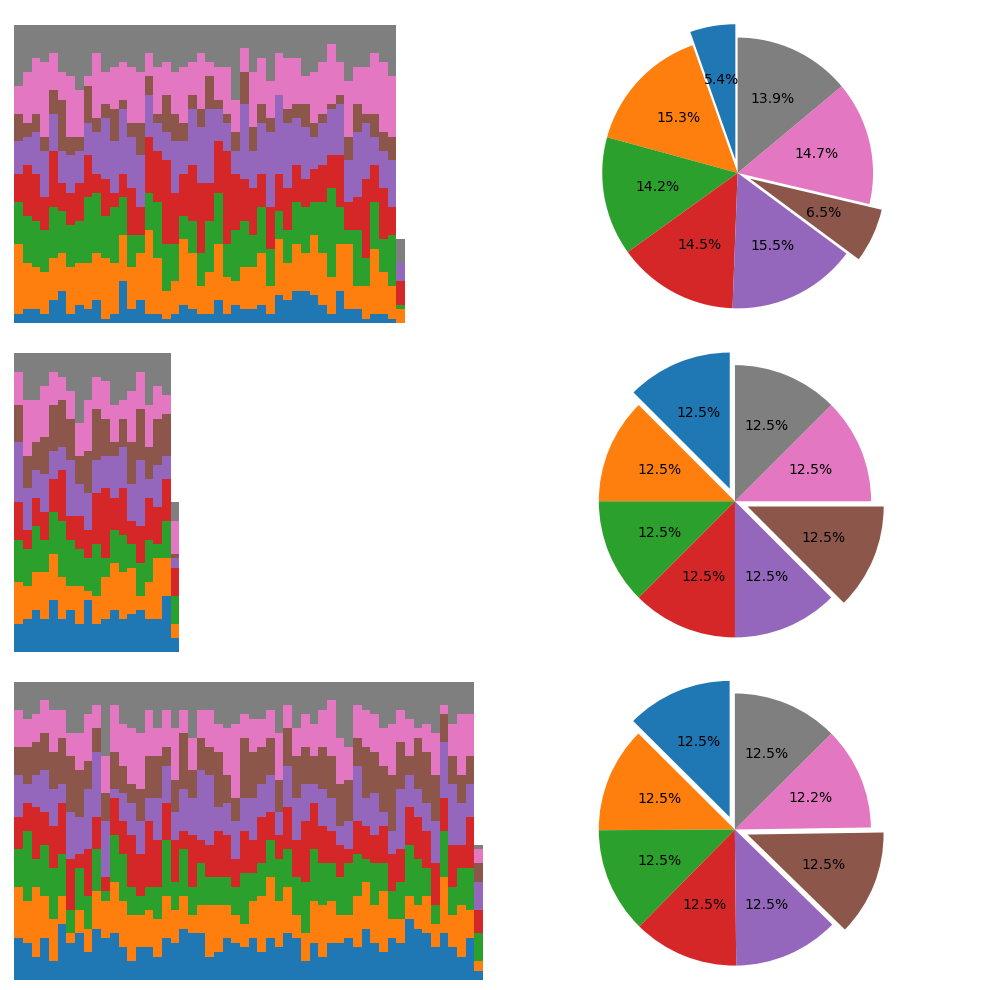

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [1., 1.]})
axs = axs.flatten()

sums_1 = plot_batches(original_dataset, ax=axs[0])
sums_2 = plot_batches(subsampled_fixed_ds, ax = axs[2])
sums_3 = plot_batches(oversampled_fixed_ds, ax = axs[4])

axs[0].axis(False)
axs[0].set_xlim([-1, 54])
axs[2].axis(False)
axs[2].set_xlim([-1, 54])
axs[4].axis(False)
axs[4].set_xlim([-1, 54])

labels = ["Species %d" % i for i in range(1, 9)]
explode = (0.1, 0, 0, 0, 0, 0.1, 0, 0)

# axs[1].set_title("Total number of training samples: %d" % sums_1.sum())
axs[1].pie(sums_1, explode=explode, 
#labels=labels, 
autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].axis(False)

# axs[3].set_title("Total number of training samples: %d" % sums_2.sum())
axs[3].pie(sums_2, explode=explode, 
#labels=labels,
 autopct='%1.1f%%', startangle=90)
axs[3].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[3].axis(False)

# axs[5].set_title("Total number of training samples: %d" % sums_3.sum())
axs[5].pie(sums_3, explode=explode, 
#labels=labels, 
autopct='%1.1f%%', startangle=90)
axs[5].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[5].axis(False)


fig.tight_layout()
fig.show()

# 45, 2834
# 19, 1184
# 54, 3421

array([80., 72., 82., 76., 82., 83., 75., 90.])

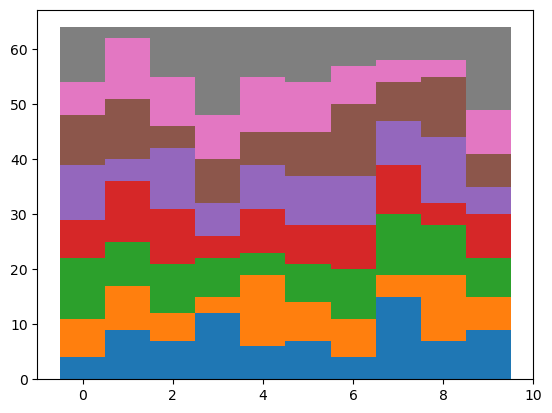

In [8]:
plot_batches(oversampled_infinite_ds, k=10)